In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 111)

In [4]:
#read the dataset and check the first five rows
df0 = pd.read_csv('/Users/vijaythirunavukarasu/Downloads/loan.csv')
df0.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
import os

current_dir = os.getcwd()
current_dir

'/Users/vijaythirunavukarasu/Downloads'

In [5]:
print(df0.shape)
df0.info(max_cols=111)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   hom

In [6]:
#Calculate missing value %
df_null_pct = df0.isnull().sum()/len(df0)*100
df_null_pct.sort_values(ascending = False)

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

In [8]:
#Filter columns with more than or equal to 50% missing values which will be our threshold to drop the columns
df0 = df0.loc[:,df_null_pct<50]

In [9]:
# print shape of the dataframe
df0.shape

(39717, 54)

In [10]:
# List the coumns which are not required for the analysis. Total 21 columns
list_drop_col1 = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']

In [11]:
# Drop the coumns which are not required for the analysis. Total 21 columns
df0.drop(list_drop_col1,axis=1,inplace = True)

In [12]:
#Observer the shape after dropping the columns
df0.shape

(39717, 33)

In [13]:
#Observe columns having single value
unique = df0.nunique()
unique.sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
zip_code                        823
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
funded_amnt_inv                8205
installment                   15383
title                       

In [14]:
#print columns with single value
list_col_unique_val = unique[unique.values==1]
print(list_col_unique_val)

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64


In [15]:
#Drop columns having single value
list_drop_col2=list_col_unique_val.index.tolist()
df0.drop(list_drop_col2,axis=1,inplace = True)
df0.shape

(39717, 25)

In [16]:
#drop columns which does not add any value to analysis and observe the shape,id, member_id, url, desc,zip_code
list_drop_col3 = ["id", "member_id", "url", "desc","zip_code"]
df0.drop(list_drop_col3,axis=1,inplace = True)
df0.shape

(39717, 20)

**Filter rows to perform targeted analysis**
*Filter based on loan_status equal to "Charged Off" and "Fully Paid" since loan_status equal to "Current" are the customers whose loan is currently active at that point in time and does not provide concrete information whether they will turn into fully paid or charged off by the end of the loan tenure.*

In [17]:
#observe the count of loan_status values
df0.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [18]:
#consider subset with values "Fully Paid" and "Charged Off" and observe the shape
df0 = df0[df0.loan_status.isin(["Fully Paid","Charged Off"])]
df0.shape

(38577, 20)

In [19]:
#print rows with null values in descending order
df0.isnull().sum(axis=1).sort_values(ascending=False)

28700    3
3297     2
18511    2
18729    2
18722    2
        ..
16008    0
16007    0
16006    0
16005    0
20428    0
Length: 38577, dtype: int64

In [20]:
#calculate percentage of null values across rows
df_missing_val_row = df0.isnull().sum(axis=1)/df0.shape[1]*100
print(df_missing_val_row.sort_values(ascending=False))

28700    15.0
3297     10.0
18511    10.0
18729    10.0
18722    10.0
         ... 
16008     0.0
16007     0.0
16006     0.0
16005     0.0
20428     0.0
Length: 38577, dtype: float64


In [21]:
#Identify rows with missing values greater than or equal to 50%
df_missing_val_row[df_missing_val_row>=50]

Series([], dtype: float64)

**Observation:
There are no rows with missing values >=50% Hence no need to drop any rows<br/>
Check for data inconsistencies<br/>
Drop rows if "funded_amnt_inv" is greater than "loan_amnt"**

In [22]:
#drop rows if "funded_amnt_inv" is greater than "loan_amnt"
df0[df0.funded_amnt_inv > df0.loan_amnt]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies


**Analysis: There are no rows with "funded_amnt_inv" is greater than "loan_amnt" Hence no rows should be dropped**

**Missing Value Imputation**

In [23]:
#Observe columns with null values
onlynull = df0.isnull().sum()
onlynull[onlynull.values>0]

emp_title               2386
emp_length              1033
title                     11
pub_rec_bankruptcies     697
dtype: int64

In [24]:
#Treating missing values for emp_title
df0["emp_title"].value_counts()

US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Length: 28027, dtype: int64

In [25]:
#calculate mode
df0["emp_title"].mode()

0    US Army
dtype: object

**Analysis: "emp_title" column has approx 6% missing values which can be replaced with mode since this is a categorical variable. But replacing with mode as "US Army" will not be meaningful hence we will not treat the missing values for this column.**

In [26]:
#Drop column emp_title
df0.drop(["emp_title"],axis=1,inplace = True)
df0.shape

(38577, 19)

In [27]:
#Treating missing values for emp_length
df0["emp_length"].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

*Analysis: After observing the values of emp_length it seems that absence of value means the employee is not working for any firm but must be running a business. Hence we can impute the missing value by "Self Employed".*

In [28]:
#Replace null with "Self Employed"
df0["emp_length"] = df0["emp_length"].fillna("Self Employed")
df0["emp_length"].isnull().sum()

0

In [29]:
#Observe values for title column
df0.title.value_counts()

Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64

*Analysis: title column falls under categorical variable but the values cannot be categorized due to variations in values hence it will be difficult to carry on analysis. So we will drop this column.*

In [30]:
#Drop column title
df0.drop(["title"],axis=1,inplace = True)
df0.shape

(38577, 18)

In [31]:
#Treating missing values for pub_rec_bankruptcies
df0.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [32]:
#Observe the null records for any inconsistency
df0[df0.pub_rec_bankruptcies.isnull()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
35006,15000,15000,14875.000000,36 months,8.94%,476.58,A,A5,< 1 year,MORTGAGE,110000.0,Not Verified,Sep-09,Fully Paid,credit_card,NY,7.07,NaN
35058,3000,3000,2988.236621,36 months,14.26%,102.92,C,C5,3 years,MORTGAGE,80800.0,Not Verified,Sep-09,Fully Paid,credit_card,TX,14.97,NaN
35362,4000,4000,3892.258856,36 months,11.14%,131.22,B,B1,< 1 year,MORTGAGE,60000.0,Not Verified,Aug-09,Charged Off,car,MI,11.08,NaN
38443,2300,2300,589.605658,36 months,13.17%,77.69,D,D2,10+ years,RENT,37152.0,Verified,Aug-08,Fully Paid,moving,NJ,2.26,NaN
38717,6000,6000,500.000000,36 months,8.00%,188.02,A,A3,< 1 year,MORTGAGE,75000.0,Not Verified,May-08,Fully Paid,other,OH,16.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.000000,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,NaN
39713,8500,8500,875.000000,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,NaN
39714,5000,5000,1325.000000,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,NaN
39715,5000,5000,650.000000,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,NaN


*Analysis: Other values seem to be proper and we cannot predict and replace the value with mean hence we will drop such rows where pub_rec_bankruptcies is null.*

In [33]:
#Filter rows with nonnull values of pub_rec_bankruptcies
df0 = df0[~df0.pub_rec_bankruptcies.isnull()]
df0.shape

(37880, 18)

**Handling Data Types**

In [34]:
#Observe the data
df0.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


In [35]:
#Observe data types
df0.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

**After observing the values and datatypes below are the manipulations required**
 - Convert "funded_amnt_inv" to int64
 - Convert "annual_inc" to int64
 - Convert "pub_rec_bankruptcies" to "int64"
 - Convert "issue_d" to Datetime
 - Convert "term" to "int64" after removing " months" string
 - Convert "int_rate" to "float64" after removing "%" symbol.
 - Remove "+" symbol from "emp_length".

In [36]:
#Convert "funded_amnt_inv" to int64
print(df0.funded_amnt_inv.dtype)
df0.funded_amnt_inv = df0.funded_amnt_inv.astype("int64")
print(df0.funded_amnt_inv.dtype)

float64
int64


In [37]:
#Convert "annual_inc" to int64
print(df0.annual_inc.dtype)
df0.annual_inc = df0.annual_inc.astype("int64")
print(df0.annual_inc.dtype)

float64
int64


In [38]:
#Convert "pub_rec_bankruptcies" to int64
print(df0.pub_rec_bankruptcies.dtype)
df0.pub_rec_bankruptcies = df0.pub_rec_bankruptcies.astype("int64")
print(df0.pub_rec_bankruptcies.dtype)

float64
int64


In [39]:
#Convert "issue_d" to Datetime
print(df0.issue_d)
df0.issue_d = pd.to_datetime(df0.issue_d,format = '%b-%y')
print(df0.issue_d)
print(df0.issue_d.dtype)

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39562    Nov-07
39573    Nov-07
39623    Oct-07
39666    Aug-07
39680    Aug-07
Name: issue_d, Length: 37880, dtype: object
0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39562   2007-11-01
39573   2007-11-01
39623   2007-10-01
39666   2007-08-01
39680   2007-08-01
Name: issue_d, Length: 37880, dtype: datetime64[ns]
datetime64[ns]


In [40]:
#Convert "term" to "int64" after removing " months" string
print(df0.term)
df0.term = df0.term.str.replace(" months",'').astype('int64')
print(df0.term)
print(df0.term.dtype)

0         36 months
1         60 months
2         36 months
3         36 months
5         36 months
            ...    
39562     36 months
39573     36 months
39623     36 months
39666     36 months
39680     36 months
Name: term, Length: 37880, dtype: object
0        36
1        60
2        36
3        36
5        36
         ..
39562    36
39573    36
39623    36
39666    36
39680    36
Name: term, Length: 37880, dtype: int64
int64


In [41]:
#Convert "int_rate" to "float64" after removing "%" symbol.
print(df0.int_rate)
df0.int_rate = df0.int_rate.str.replace("%",'').astype('float64')
print(df0.int_rate)

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39562    10.28%
39573    10.59%
39623    12.49%
39666    11.22%
39680    11.86%
Name: int_rate, Length: 37880, dtype: object
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39562    10.28
39573    10.59
39623    12.49
39666    11.22
39680    11.86
Name: int_rate, Length: 37880, dtype: float64


In [42]:
#Observe values of emp_length and Remove "+".
df0.emp_length.value_counts()

10+ years        8369
< 1 year         4341
2 years          4207
3 years          3951
4 years          3297
5 years          3161
1 year           3077
6 years          2136
7 years          1689
8 years          1410
9 years          1209
Self Employed    1033
Name: emp_length, dtype: int64

In [43]:
#remove '+'
df0.emp_length = df0.emp_length.str.replace("+",'')
df0.emp_length.value_counts()

10 years         8369
< 1 year         4341
2 years          4207
3 years          3951
4 years          3297
5 years          3161
1 year           3077
6 years          2136
7 years          1689
8 years          1410
9 years          1209
Self Employed    1033
Name: emp_length, dtype: int64

<h1>Outliers</h1>

In [44]:
#Observe basic statistical details about the dataset
df0.annual_inc.describe()

count    3.788000e+04
mean     6.876386e+04
std      6.357379e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<h1>Remove outliers based on annual_inc</h1>

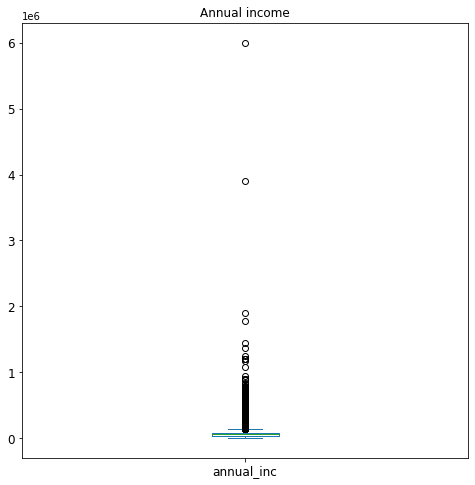

In [45]:
#Plot boxplot to observe the outliers
df0.annual_inc.plot.box(fontsize = 12, figsize = (8,8)).set(title='Annual income')
plt.show()

In [46]:
#Observe Quantiles
quantiles = df0.annual_inc.quantile([0.01, 0.25, 0.5, 0.75, 0.99])
print(quantiles)

0.01     14400.0
0.25     40000.0
0.50     59000.0
0.75     82000.0
0.99    234000.0
Name: annual_inc, dtype: float64


In [47]:
#Remove outliers
df1 = df0[(df0.annual_inc > 14400) & (df0.annual_inc<234144)]

In [48]:
# 234000.0 should be the max
df1.annual_inc.max()

234000

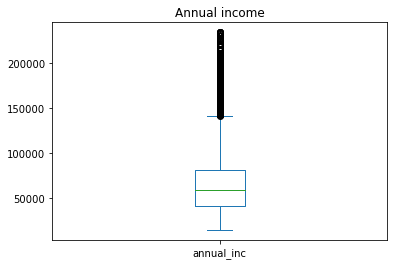

In [49]:
#Plot boxplot from new dataset after removing obvious outliers
df1.annual_inc.plot.box().set(title='Annual income')
plt.show()

In [50]:
#Final dataset after data cleaning and data handling
print(df1.head())
print(df1.shape)

   loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       5000         5000             4975    36     10.65       162.87     B   
1       2500         2500             2500    60     15.27        59.83     C   
3      10000        10000            10000    36     13.49       339.31     C   
5       5000         5000             5000    36      7.90       156.46     A   
6       7000         7000             7000    60     15.96       170.08     C   

  sub_grade emp_length home_ownership  annual_inc verification_status  \
0        B2   10 years           RENT       24000            Verified   
1        C4   < 1 year           RENT       30000     Source Verified   
3        C1   10 years           RENT       49200     Source Verified   
5        A4    3 years           RENT       36000     Source Verified   
6        C5    8 years           RENT       47004        Not Verified   

     issue_d  loan_status             purpose addr_state    dti  \
0 2011-

**Derived metrics for Month and Year from column "issue_d"**

In [51]:
#Derived metrics analysis on column "issue_d"
df1["issue_y"]=df0.issue_d.dt.year
df1["issue_m"]=df0.issue_d.dt.month


In [52]:
df1[["issue_d","issue_m","issue_y"]].head()

,issue_d,issue_m,issue_y
0,2011-12-01,12,2011
1,2011-12-01,12,2011
3,2011-12-01,12,2011
5,2011-12-01,12,2011
6,2011-12-01,12,2011


**Derived metrics for "loan_amnt" to "annual_inc" ratio**

In [53]:
#Calculate Loan to Amount income ratio
df1["amnt_to_inc_ratio"] = df1.loan_amnt/df1.annual_inc
df1[["loan_amnt", "annual_inc","amnt_to_inc_ratio"]]

,loan_amnt,annual_inc,amnt_to_inc_ratio
0,5000,24000,0.208333
1,2500,30000,0.083333
3,10000,49200,0.203252
5,5000,36000,0.138889
6,7000,47004,0.148923
...,...,...,...
39562,4800,35000,0.137143
39573,7000,63500,0.110236
39623,9000,39000,0.230769
39666,15450,40000,0.386250


In [54]:
#Create new column loan_status_code with 0 and 1 values based on loan_status column where 0="Charged Off" and 1="Fully Paid"
loan_status_map = {'Charged Off':1,'Fully Paid':0 }
df1["loan_status_code"] = df1["loan_status"].map(loan_status_map)
print(df1["loan_status_code"])

0        0
1        1
3        0
5        0
6        0
        ..
39562    0
39573    0
39623    1
39666    1
39680    0
Name: loan_status_code, Length: 37095, dtype: int64


In [55]:
df1.loan_status_code.value_counts()

0    31728
1     5367
Name: loan_status_code, dtype: int64

In [56]:
#Creating different groups for interest rate
#Int_rate is between 5% to 25%, grouping them accordingly
df1.int_rate.describe

<bound method NDFrame.describe of 0        10.65
1        15.27
3        13.49
5         7.90
6        15.96
         ...  
39562    10.28
39573    10.59
39623    12.49
39666    11.22
39680    11.86
Name: int_rate, Length: 37095, dtype: float64>

In [57]:
#Treating for int_rate
bins = [5, 9, 13, 17, 21, 25]
labels = ['5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']

In [58]:
df1['int_rate_group'] = pd.cut(df1['int_rate'], bins=bins,
                               labels=labels)

df1['int_rate_group'].value_counts()

9%-13%     13469
13%-17%    10680
5%-9%       9486
17%-21%     3134
21%-25%      326
Name: int_rate_group, dtype: int64

In [59]:
#Combining "Source Verified" and "Verified" into "Verified"
df1["verification_status"] = df1.verification_status.str.replace("Source Verified", "Verified")

df1.verification_status.value_counts()

Verified        21384
Not Verified    15711
Name: verification_status, dtype: int64

In [60]:
#Treating for annual_income
bins = [ 14400, 25000, 50000, 100000,150000,234000]
labels = ['14k-25k','25k-50k','50k-100k','100k-150k','150k-250k']

df1['annual_inc_group'] = pd.cut(df1['annual_inc'], bins=bins,
                               labels=labels)
df1['annual_inc_group'].value_counts()

50k-100k     17424
25k-50k      12599
100k-150k     3925
14k-25k       2066
150k-250k     1081
Name: annual_inc_group, dtype: int64

In [61]:
#define a function to attach values with each bar
def autolabel(ax,x):
    """
    Attach a text label above each bar displaying its height
    """
    for p in ax.patches:
        ax.annotate('{:1}'.format(p.get_height()), (p.get_x()+x, p.get_height()+10))

In [62]:
#define function to plot countplot for categorical variables
def plotme(df, col_name):
    fig, ax = plt.subplots(figsize=(10,6)  , dpi=100)
    sns.countplot(x=col_name, data=df, order = df[col_name].value_counts().index)
    ax.set_xlabel(col_name)
    ax.set_ylabel('No of loans')
    ax.set_title('Plot of ' + col_name, weight='bold')
    plt.xticks(rotation=90)
    autolabel(ax,0.01)
    plt.show()

In [63]:
#define function to plot countplot for numerical variables
def plotme_num(df, col_name):
    fig, ax = plt.subplots(figsize=(10,6)  , dpi=100)
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    sns.distplot(a=df[col_name], rug=True,    color='#388E3C')
    plt.subplot(1,2,2)
    sns.boxplot(data=df[col_name], color='#388E3C')
    plt.suptitle('Distribution of '+ col_name)
    autolabel(ax,0.01)
    plt.show()

**Ordered Categorical data
grade, sub_grade, term, emp_length, issue_y, issue_m**

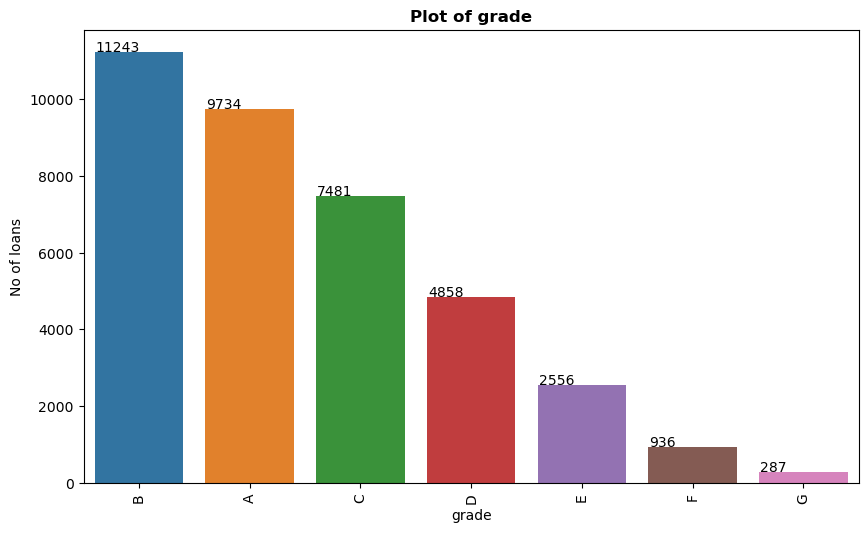

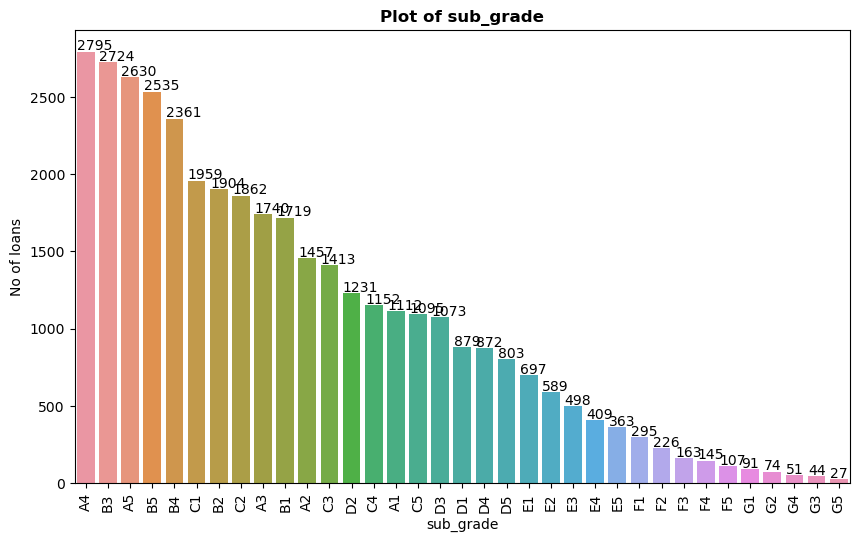

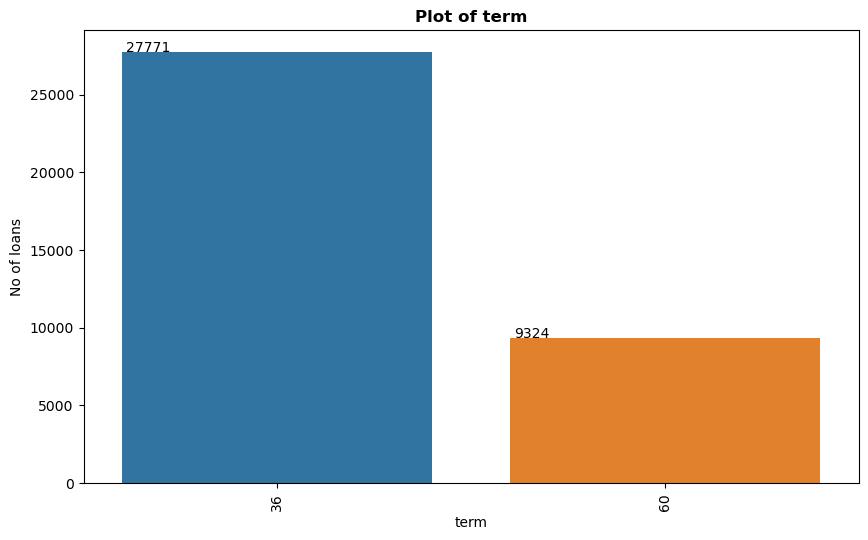

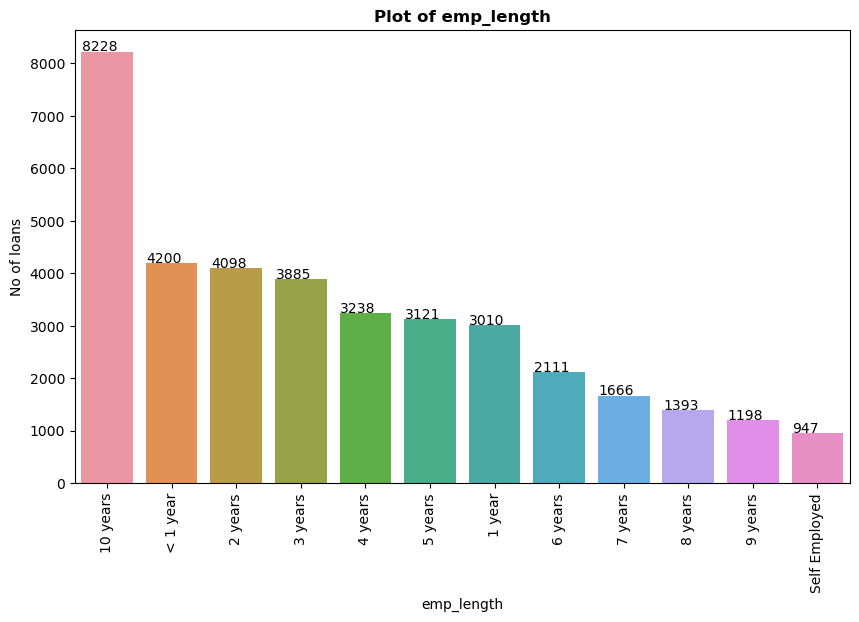

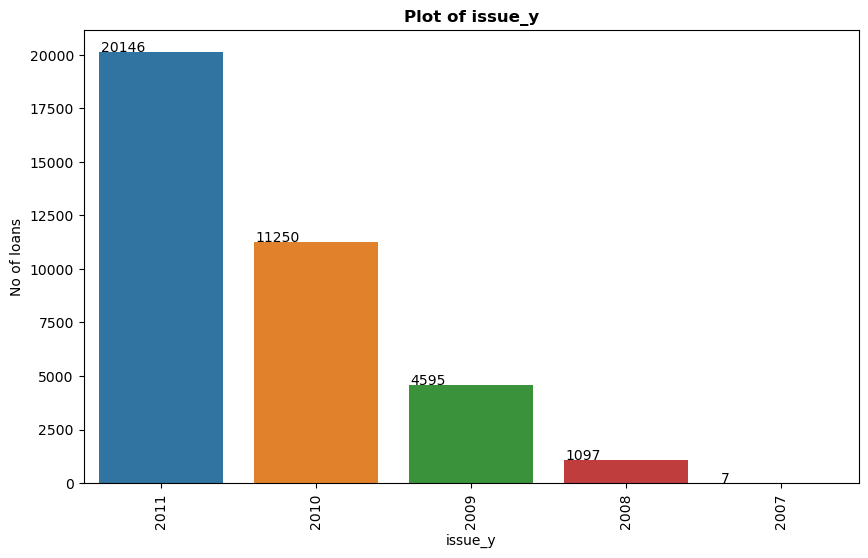

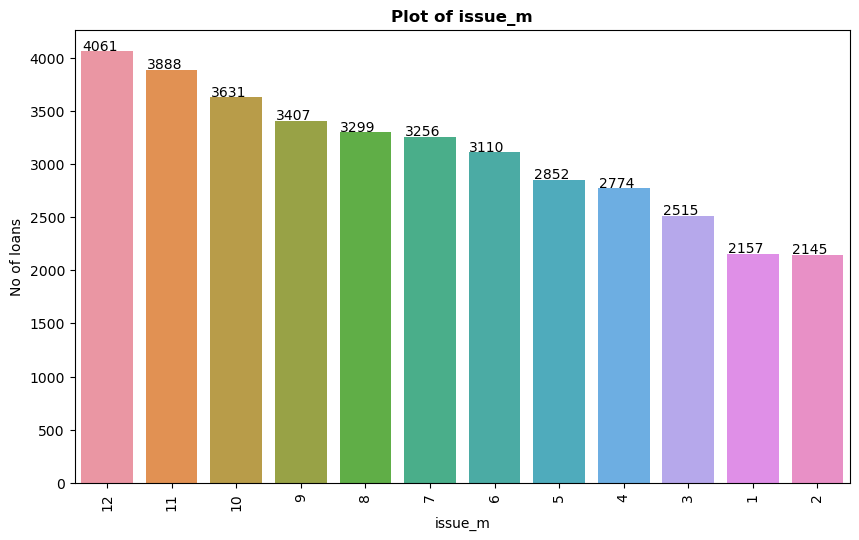

In [64]:
#countplot for "grade", "sub_grade","term","emp_length","issue_y","issue_m"
for col in ["grade", "sub_grade","term","emp_length","issue_y","issue_m"]:
    plotme(df1, col)

**Observation
 - Plot of Grade shows Grade A and B are given more loans compared to other grades
 - Plot of Sub Grade shows Grade A4, B3, A5, B5, B4 are given more loans compared to other grades
 - Plot of term shows 36 months loans are issued more compared to 60 months loan
 - Plot of shows employees with 10 years and above are given loan comapred with lesser experience
 - Plot of issue year shows maximum loans were taken in the year 2011. The trend is increasing with the increase in the year
 - Plot of issue month shows there is increasing trend in number of loans with increase in the months. Maximum loans were given in the month of Oct, Nov, Dec.**


**Unordered Categorical data <br/>
loan_status**

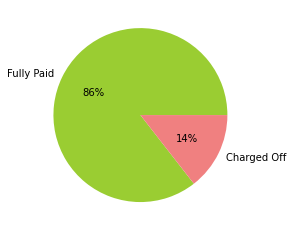

In [65]:
#Plot pie chart for loan_status
data = df1.loan_status.value_counts()
labels = ['Fully Paid','Charged Off']
colors = ['yellowgreen', 'lightcoral']
plt.pie(data, labels=labels, colors = colors, autopct = '%0.0f%%')

plt.show()

**Observation<br/>
This shows that 14% of total loans are charged off.<br/><br/>
addr_state, purpose, home_ownership**

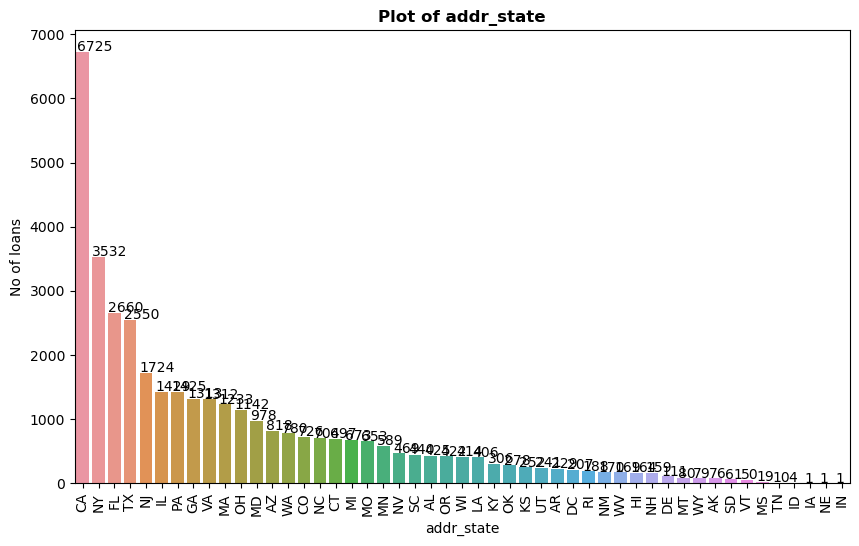

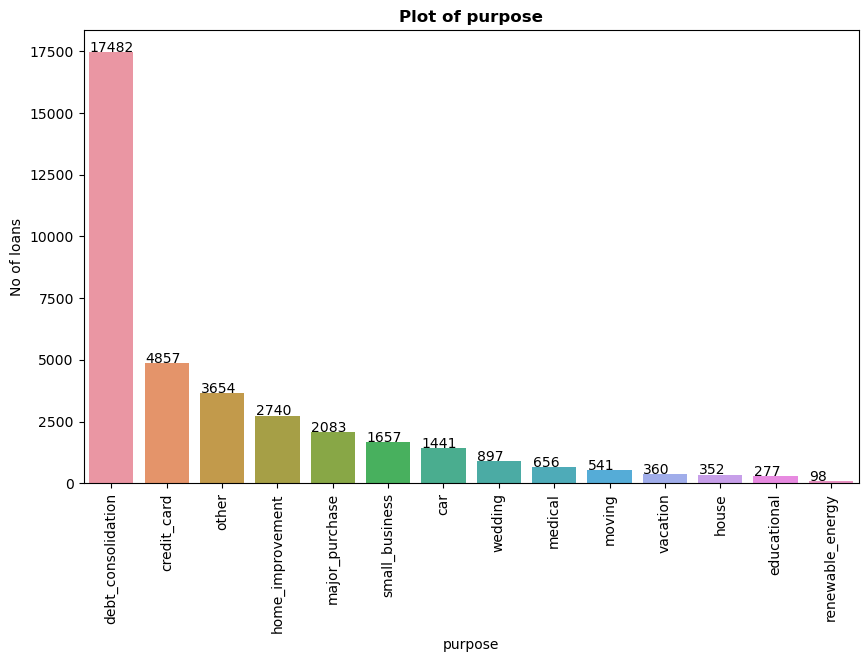

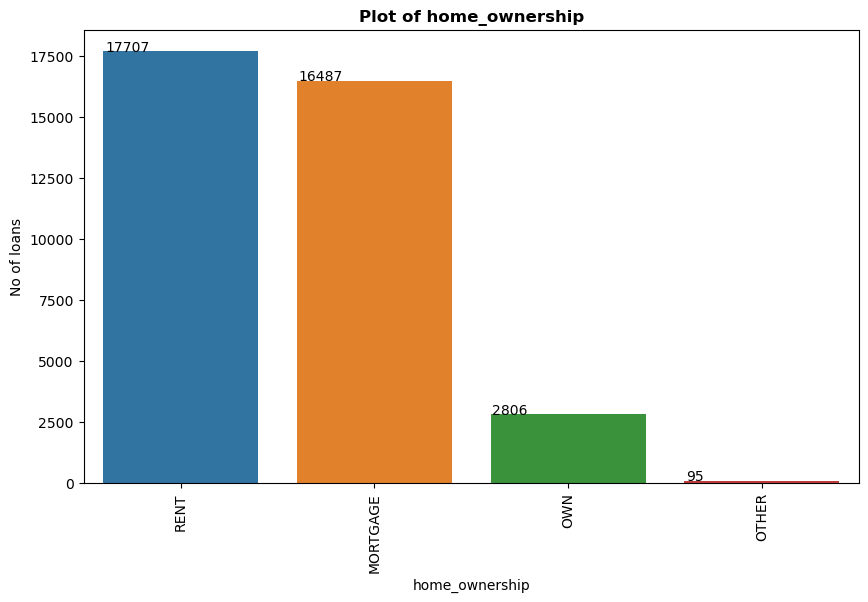

In [66]:
#Plot countplot for "addr_state", "purpose","home_ownership"
for col in ["addr_state", "purpose","home_ownership"]:
    plotme(df1, col)

Observation<br/>
 - States CA, NY, FL and TX are the states for which maximum loans have been issued
 - Maximum loans are given for debt consolidation, paying off Credit card and 'other' reasons
 - Education and renewable energy is the least category where loans have been given
 - People who are in Rented house or Mortgate have availed maximum loans <br/>


**Quantitative**<br/>
**funded_amnt, installment, amnt_to_inc_ratio**

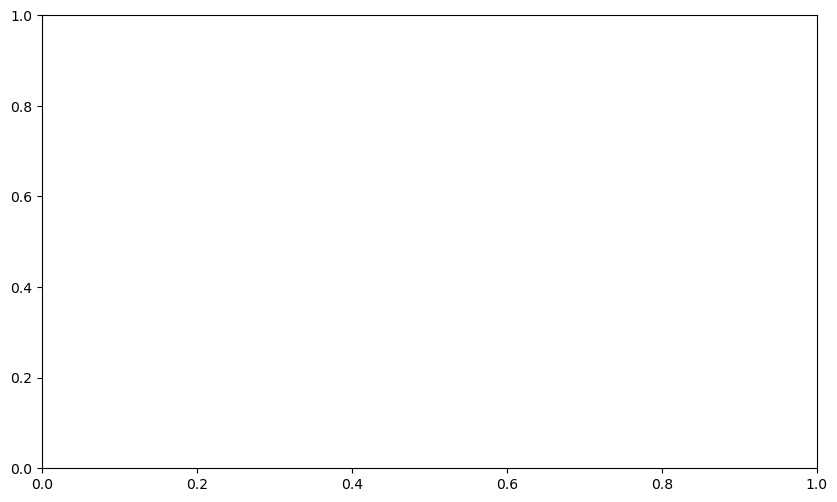

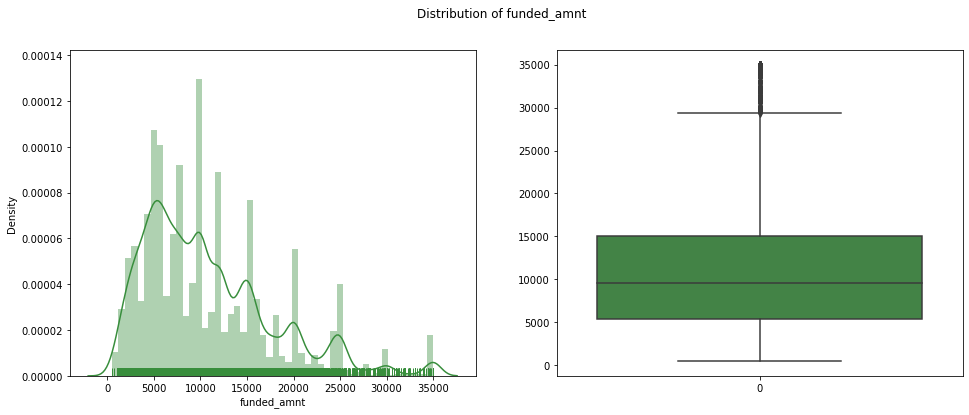

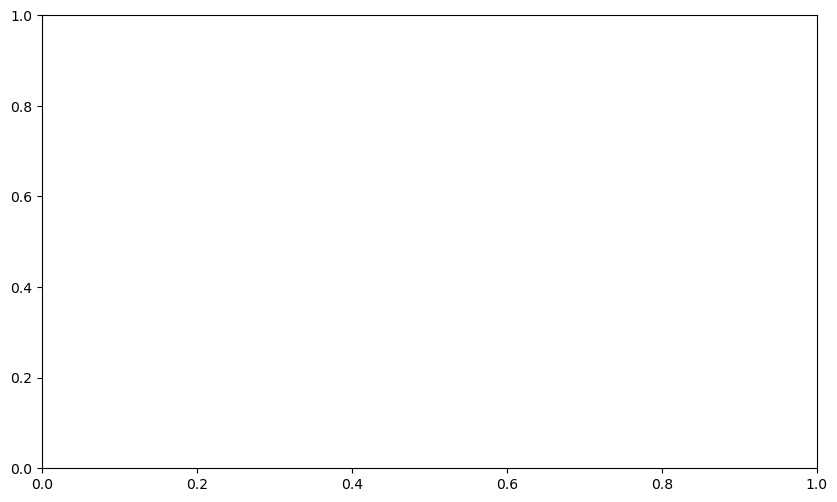

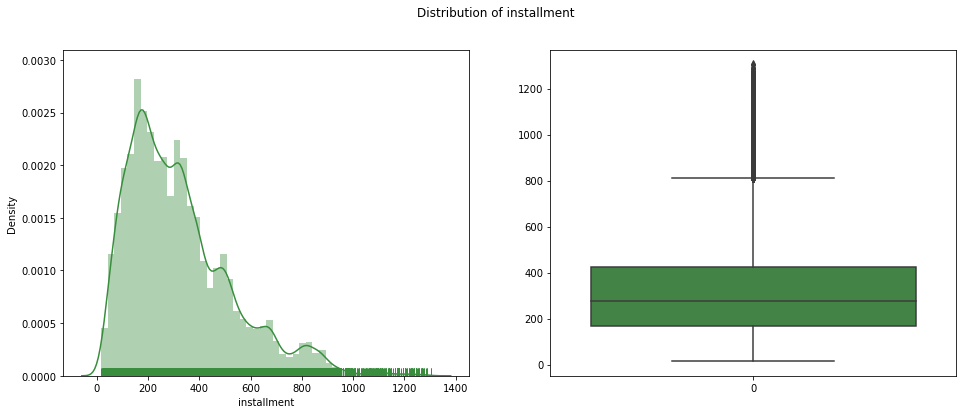

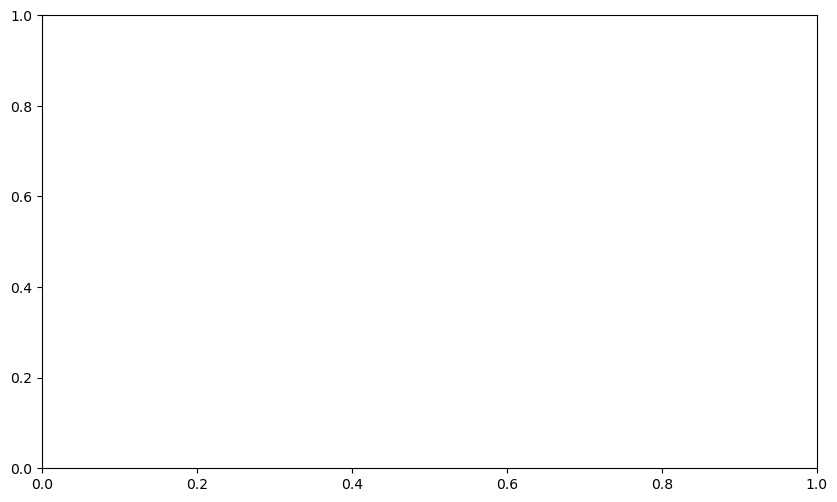

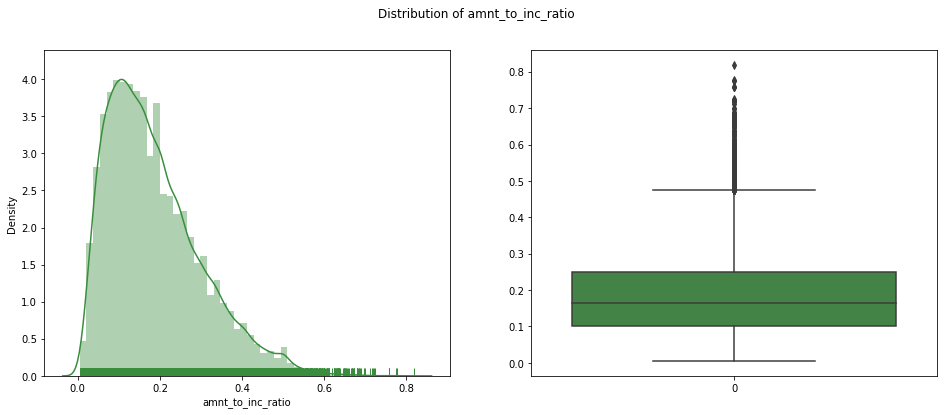

In [67]:
#Plot distplot and boxplot for "funded_amnt","installment","amnt_to_inc_ratio"
for col in ["funded_amnt","installment","amnt_to_inc_ratio"]:
    plotme_num(df1, col)

**Observation**<br/>
 - Funded amount is ranging from 5000 to 15000 USD
 - Installment amount is ranging from 200 to 400 USD
 - The amount to income ratio median is around 0.18 which is a good indicator

**Segmented Univariate Analyis**<br/>
*int_rate_group*

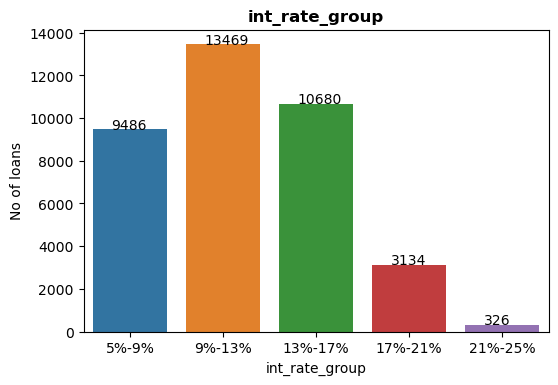

In [68]:
#Countplot of int_rate_group
fig, ax = plt.subplots(figsize=(6,4)  , dpi=100)

sns.countplot(x='int_rate_group', 
              data=df1)
 
ax.set_xlabel('int_rate_group')
ax.set_ylabel('No of loans')

ax.set_title('int_rate_group', weight='bold')
autolabel(ax,0.20)

plt.show()

**Observation**<br/>
 - Interest rate range 9 to 13 is the range where maximum loans have been issued
 - 21 - 25% is the range where minimum loans have been issued

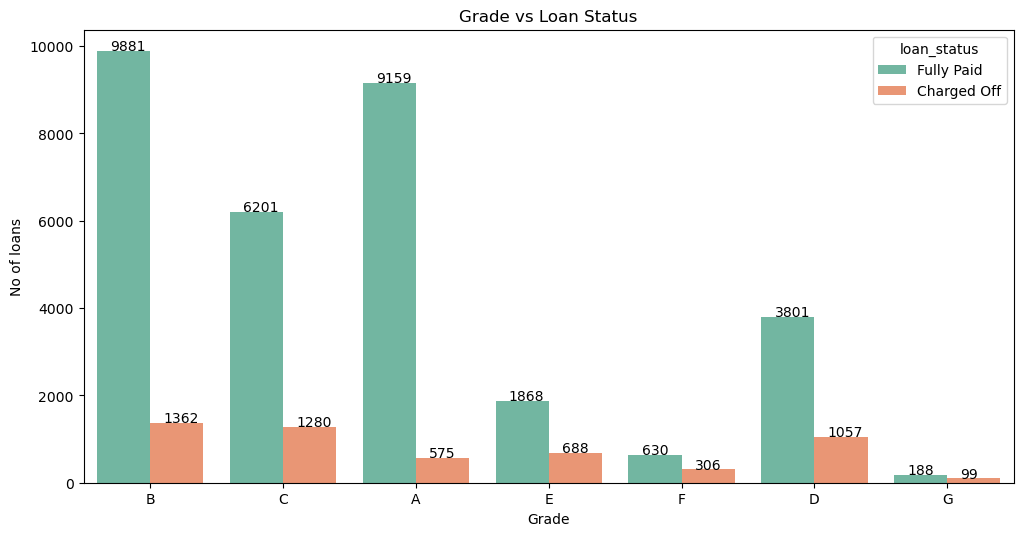

In [69]:
#Countplot of Grade vs Loan Status
fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)

sns.countplot(x='grade', hue="loan_status", 
              data=df1, 
              palette = "Set2")

ax.set_xlabel('Grade')
ax.set_ylabel('No of loans')

autolabel(ax,0.1)
ax.set_title('Grade vs Loan Status')

plt.show()

**Observation**<br/>
Based on the counts, Grade B, C and D are top three in Charged Off


**Sub grade vs loan status**

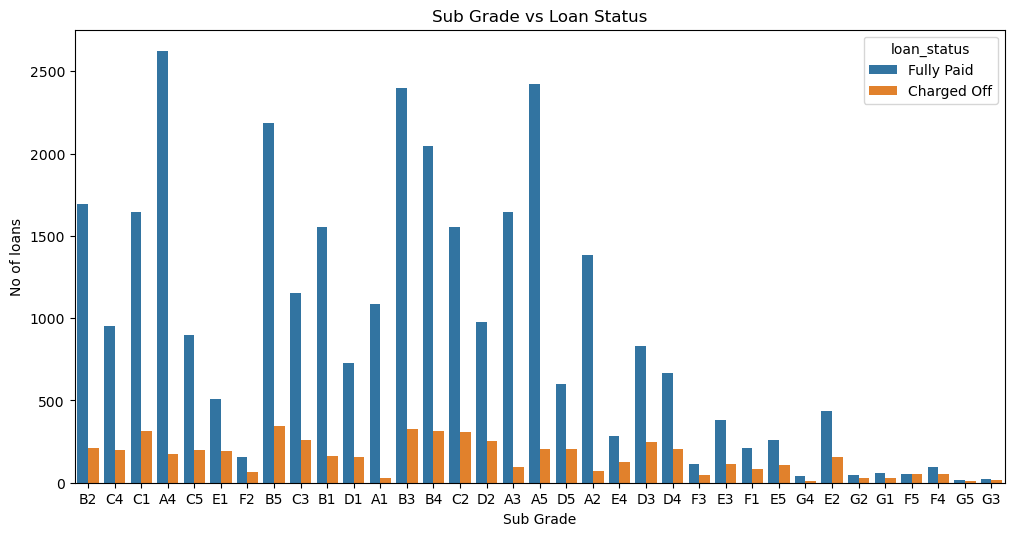

In [70]:
#Countplot of Sub Grade vs Loan Status
fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)

sns.countplot(x='sub_grade', hue="loan_status", 
              data=df1)

ax.set_xlabel('Sub Grade')
ax.set_ylabel('No of loans')

ax.set_title('Sub Grade vs Loan Status')

plt.show()

**Observation**<br/>
Based on the counts, Grade B3,B4,B5, C1,C2, D3, D4 top sub grades in Charged Off

*Terms vs Loan Status*

Text(0.5, 1.0, 'Term vs Loan Status(Charged off)')

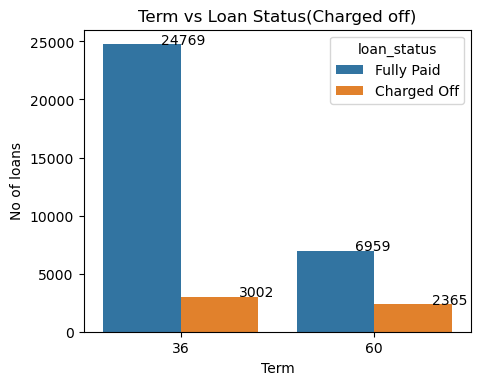

In [71]:
#Countplot of Term vs Loan Status
fig, ax = plt.subplots(figsize=(5,4)  , dpi=100)
sns.countplot(x='term',  hue="loan_status", 
              data=df1)
                  
ax.set_xlabel('Term')
ax.set_ylabel('No of loans')

autolabel(ax,0.30)
ax.set_title('Term vs Loan Status(Charged off)')

**Observation**<br/>
36 month loan default is more compared to 60 month

**Employment Length vs Loan Status**

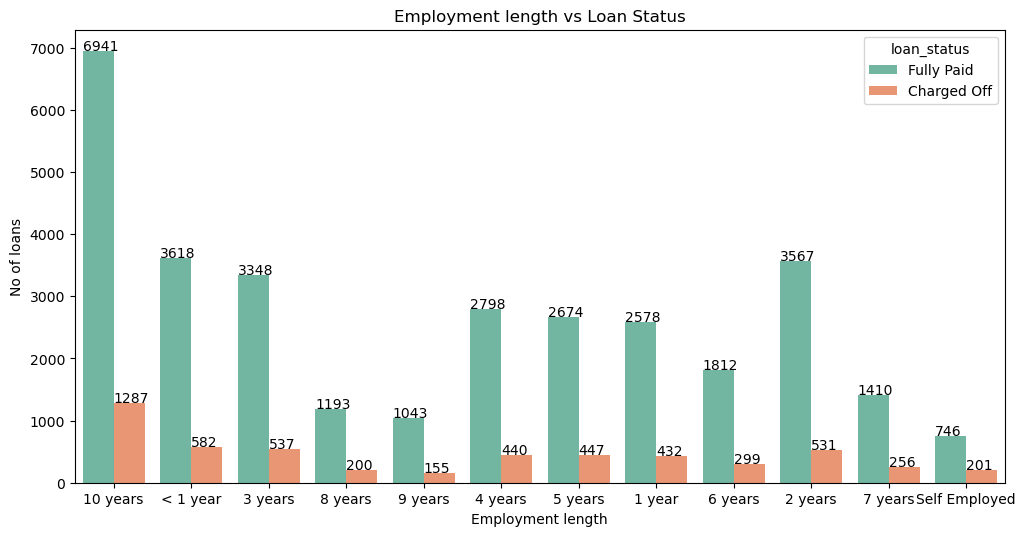

In [72]:
#Countplot of Employment Length vs Loan Status
fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)

sns.countplot(x='emp_length', hue="loan_status", 
              data=df1, 
              palette = "Set2")
              
    
ax.set_xlabel('Employment length')
ax.set_ylabel('No of loans')

ax.set_title('Employment length vs Loan Status')
autolabel(ax,0.001)

**Observation**<br/>
Maximum loans are issued for category 10 years and they are the maximum defaulters

**Loan Issue Year vs Loan Status**

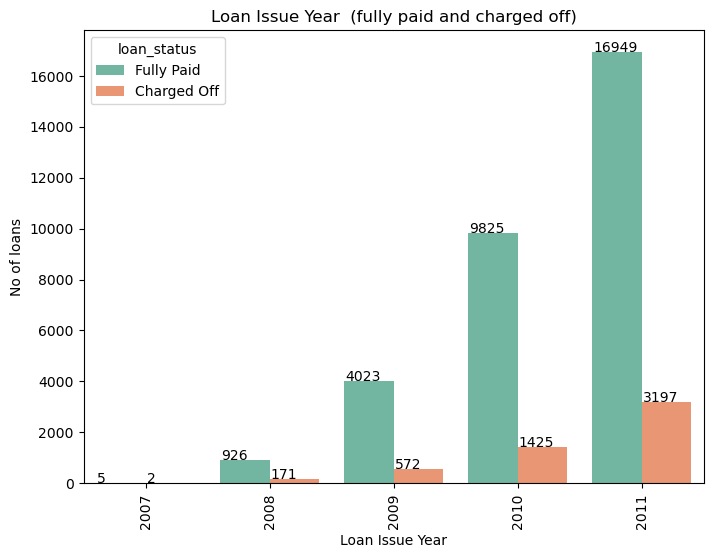

In [73]:
#Countplot of Loan Issue Year vs Loan Status
fig, ax = plt.subplots(figsize=(8,6)  , dpi=100)
plt.xticks(rotation=90)
sns.countplot(x='issue_y',
              data=df1, hue="loan_status",
              palette = "Set2")
              

ax.set_xlabel('Loan Issue Year')
ax.set_ylabel('No of loans')

autolabel(ax,0.01)
ax.set_title('Loan Issue Year  (fully paid and charged off)')

plt.show()

**Observation**<br/>
 - Plot of loan issue year shows maximum loans were taken in the year 2011
 - Also high loans are being Charged Off in 2011

**Loan issue month vs loan status**

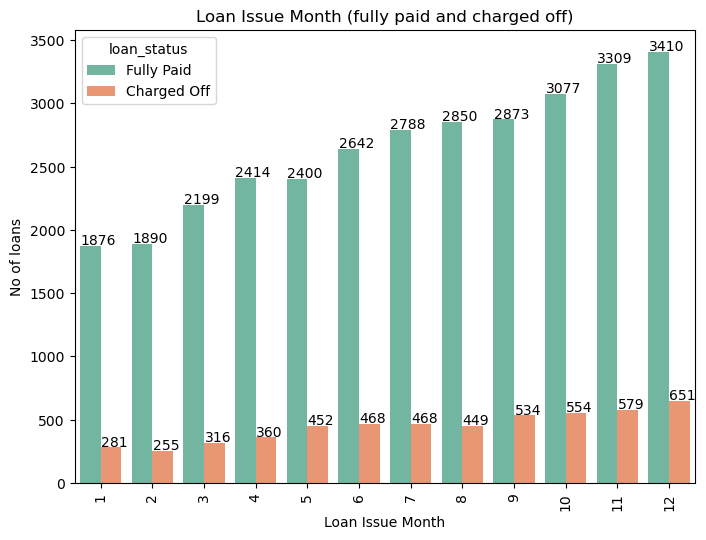

In [74]:
#Countplot of Loan Issue Month vs Loan Status
fig, ax = plt.subplots(figsize=(8,6)  , dpi=100)
plt.xticks(rotation=90)
sns.countplot(x='issue_m',
              data=df1, hue="loan_status",
              palette = "Set2")
              

ax.set_xlabel('Loan Issue Month')
ax.set_ylabel('No of loans')

autolabel(ax,0.01)
ax.set_title('Loan Issue Month (fully paid and charged off)')

plt.show()

**Observation**<br/>
 - Plot of the loan issue month shows maximum loans were given in the month of Oct, Nov, Dec.
 - Also high loans are being Charged Off for the loans issued in Sep - Dec months

**Purpose vs loan status**

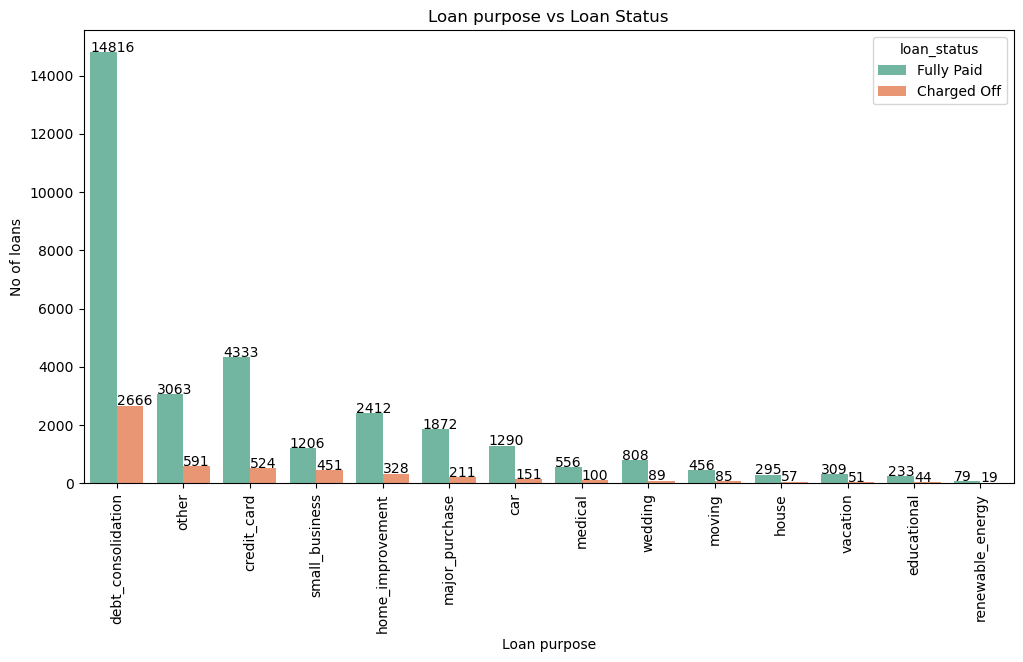

In [75]:
#Countplot of Purpose vs Loan Status
fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)
plt.xticks(rotation=90)
sns.countplot(x='purpose', hue="loan_status", 
              data=df1, 
              palette = "Set2", 
              order = df1[df1.loan_status=="Charged Off"].purpose.value_counts().index)

ax.set_xlabel('Loan purpose')
ax.set_ylabel('No of loans')

ax.set_title('Loan purpose vs Loan Status')
autolabel(ax,0.001)

plt.show()

**Observation**
 - Loans with purpose debt consolidation, other, credit crd and home improvement categories have failed to pay the loan compared with education / renewable energy
 - Also debt consolidation is the category where maximum loans are issued.

**Home Ownership vs Loan Status**

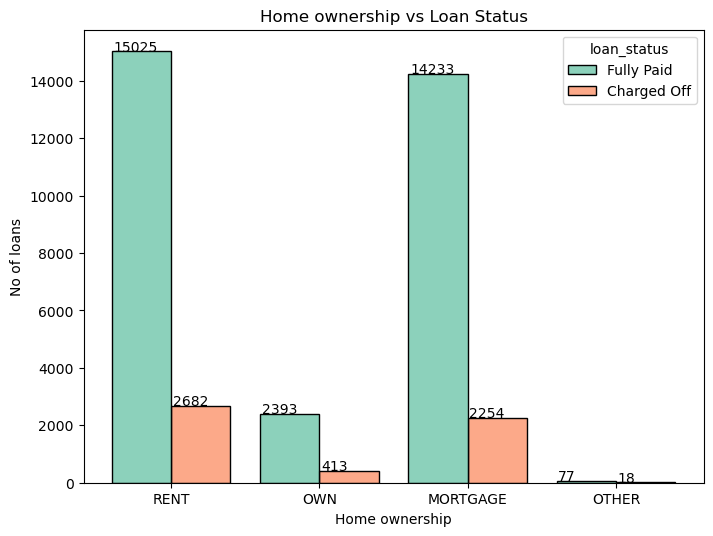

In [76]:
#Hist of Home Ownership vs Loan Status
fig, ax = plt.subplots(figsize=(8,6)  , dpi=100)

sns.histplot(data=df1, x="home_ownership", hue="loan_status", 
             multiple="dodge", shrink=.8,
             palette = "Set2")
    
ax.set_xlabel('Home ownership')
ax.set_ylabel('No of loans')

ax.set_title('Home ownership vs Loan Status')

autolabel(ax,0.01)

**Observation**<br/>
People who are in Rent or Mortage have failed to pay the loan compared with people in Own house

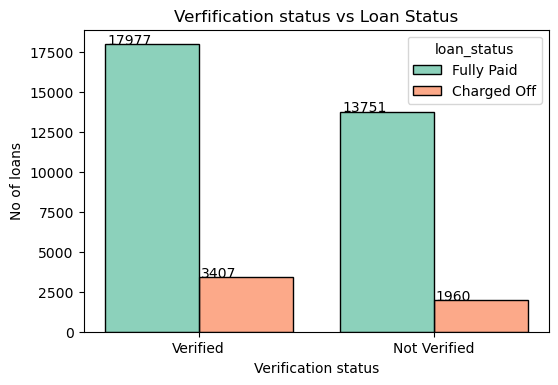

In [77]:
#Histplot of Verification vs Loan Status
fig, ax = plt.subplots(figsize=(6,4)  , dpi=100)

sns.histplot(data=df1, x="verification_status", hue="loan_status", 
             multiple="dodge", shrink=.8,
             palette = "Set2")
    
ax.set_xlabel('Verification status')
ax.set_ylabel('No of loans')

ax.set_title('Verfification status vs Loan Status')
autolabel(ax,0.01)

plt.show()

**Observation**<br/>
The amount of Verified loans which are Charged Off is more compared to Not Verified

**State vs Loan Status**

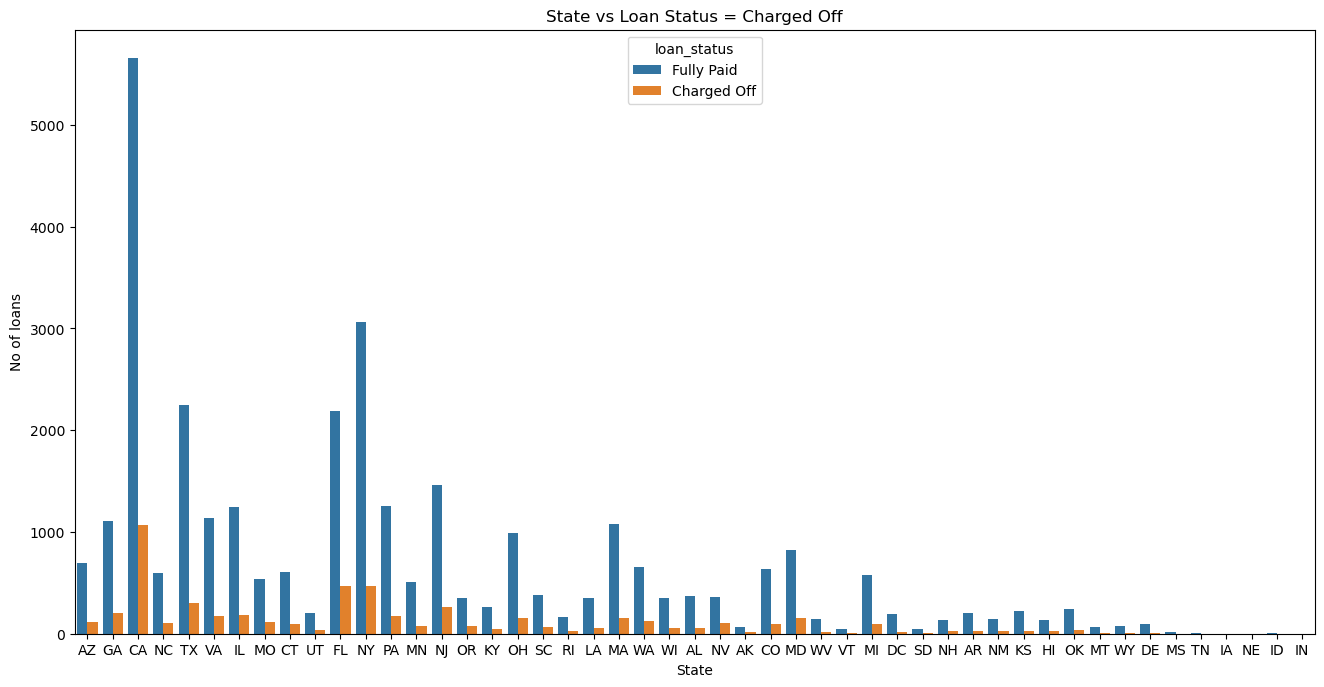

In [78]:
#Countplot of State vs Loan Status
fig, ax = plt.subplots(figsize=(16,8)  , dpi=100)

sns.countplot(x='addr_state',  hue="loan_status",
              data=df1)

ax.set_xlabel('State')
ax.set_ylabel('No of loans')

ax.set_title('State vs Loan Status = Charged Off')

plt.show()

**Observation**<br/>
Borrowers from states CA, FL, NY and NJ have shown maximum tendency to default

**Employment length vs Loan status**

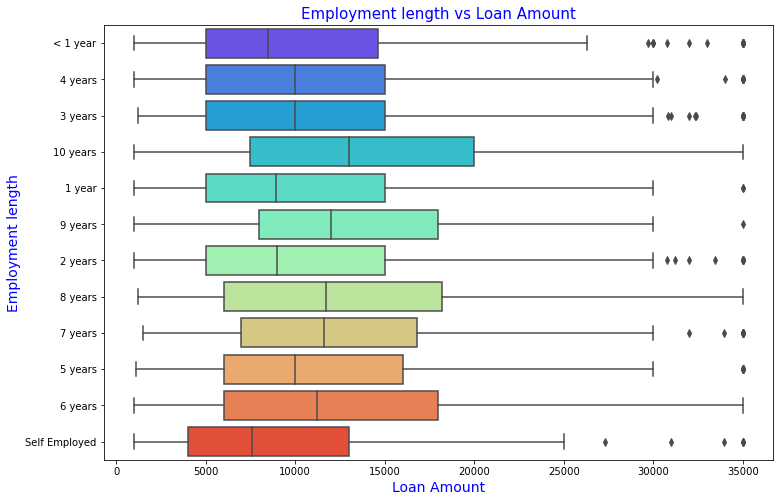

In [79]:
#Boxplot of Employment length vs Loan status
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='emp_length', x='loan_amnt', data =df1[df1.loan_status=="Charged Off"],palette='rainbow')
ax.set_title('Employment length vs Loan Amount',fontsize=15,color='b')
ax.set_ylabel('Employment length',fontsize=14,color = 'b')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'b')
plt.show()

**Observation**<br/>
 - Employment length of 10 years got more loans and they are the maximum defaulters
 - Followed by year 6, 7, 8 and 9 where the medians are almost close

**Grade vs Loan status**

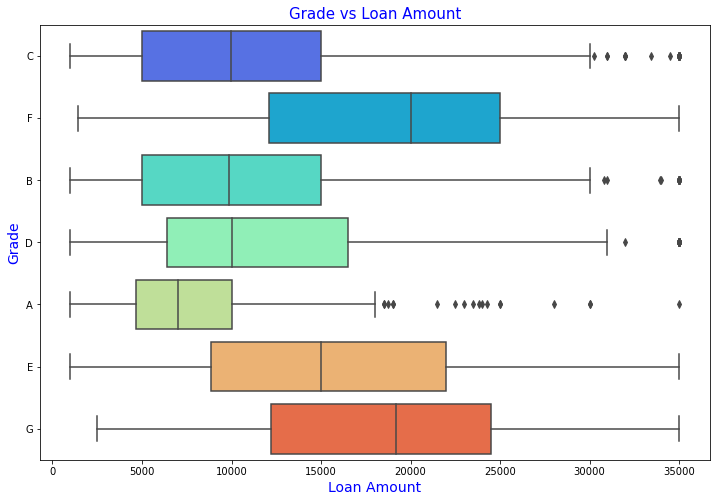

In [80]:
#Boxplot Grade vs Loan status
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='grade', x='loan_amnt', data =df1[df1.loan_status=="Charged Off"],palette='rainbow')
ax.set_title('Grade vs Loan Amount',fontsize=15,color='b')
ax.set_ylabel('Grade',fontsize=14,color = 'b')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'b')
plt.show()

**Observation**<br/>
 - Grade F, G and E are the three category which are top three in Charged off
 - Grade F and G have the median around 20k and Q3 at 25k
 - Grade A is the least with median at 7.5k

**State vs Loan status = Charged Off**

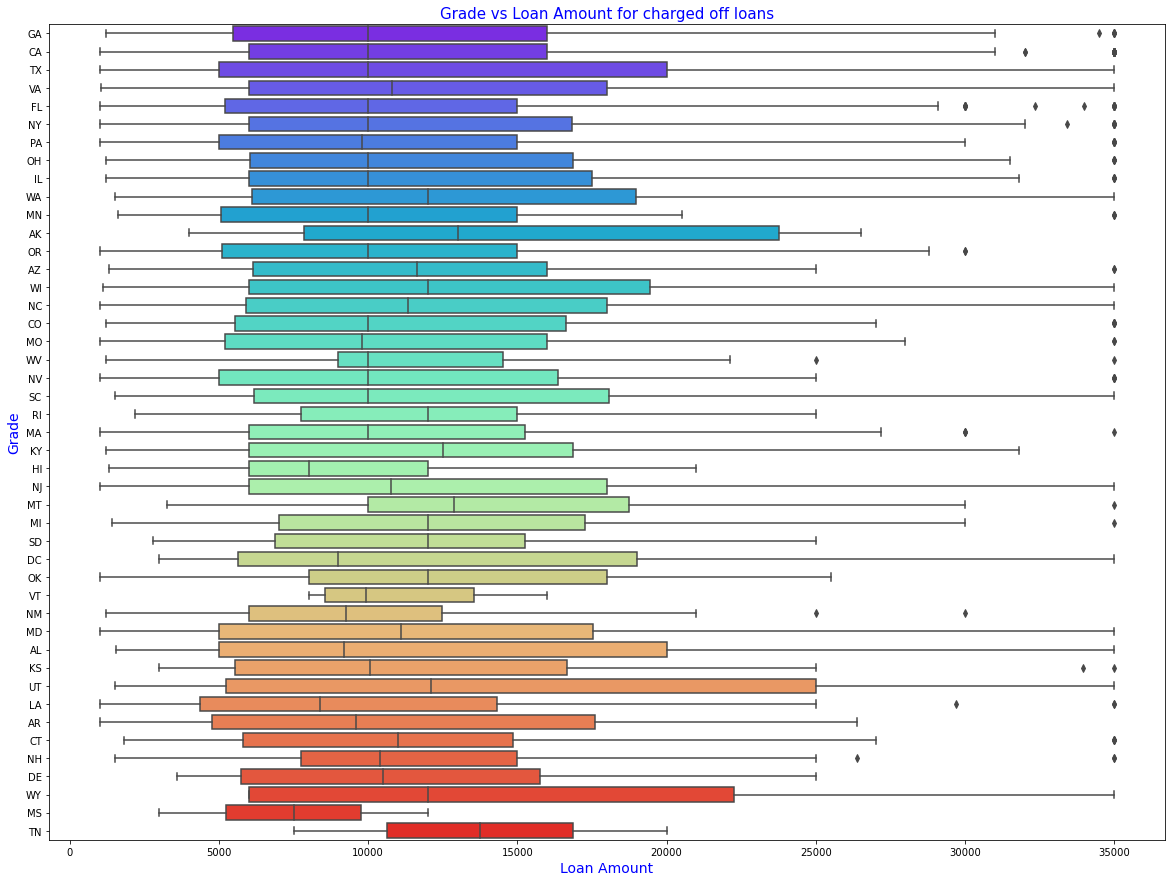

In [81]:
#Boxplot of State vs Loan status
plt.figure(figsize=(20,15))
ax = sns.boxplot(y='addr_state', x='loan_amnt', data =df1[df1.loan_status=="Charged Off"],palette='rainbow')
ax.set_title('Grade vs Loan Amount for charged off loans',fontsize=15,color='b')
ax.set_ylabel('Grade',fontsize=14,color = 'b')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'b')
plt.show()

**Observation**
 - Many states median is at 10k for charged off loan
 - State AK, MT, KY, UT, TN are marginally above the 10k level and at 13k
 - States AK, UT the Q3 is at 23k

**DTI vs Loan status**

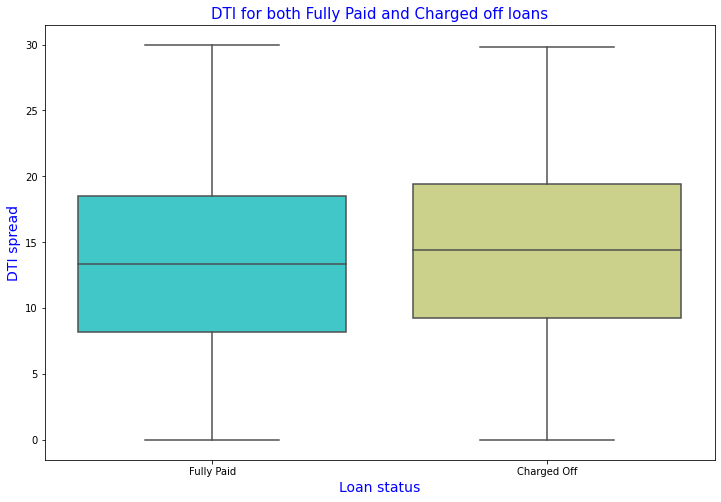

In [82]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='dti', x='loan_status', data =df1,palette='rainbow')
ax.set_title('DTI for both Fully Paid and Charged off loans',fontsize=15,color='b')
ax.set_ylabel('DTI spread',fontsize=14,color = 'b')
ax.set_xlabel('Loan status',fontsize=14,color = 'b')
plt.show()

**Observation**<br/>
DTI dosent seem to be contributing because the median is close to each other for Fully Paid and Charged Off

**amnt_to_inc_ratio vs Loan status**

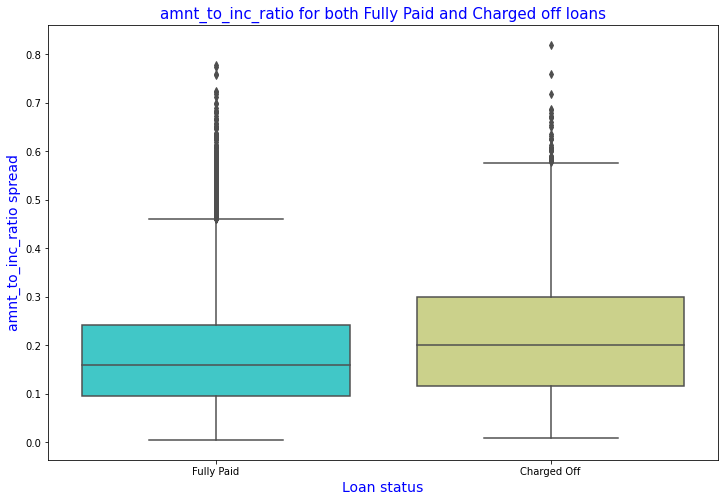

In [83]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='amnt_to_inc_ratio', x='loan_status', data =df1,palette='rainbow')
ax.set_title('amnt_to_inc_ratio for both Fully Paid and Charged off loans',fontsize=15,color='b')
ax.set_ylabel('amnt_to_inc_ratio spread',fontsize=14,color = 'b')
ax.set_xlabel('Loan status',fontsize=14,color = 'b')
plt.show()

**Observation**<br/>
 - Amnt_to_int_ratio is contributing for bad loans
 - This is evident looking at the box plot

**Multivariate Analysis**

In [84]:
def cal_deflt_pct(df,col) :
    out_deflt = pd.crosstab(df[col], df['loan_status'],margins=True)
    out_deflt['All'] = out_deflt['Charged Off'] + out_deflt['Fully Paid']
    out_deflt['Loan Default Percentage'] = round((out_deflt['Charged Off']*100/out_deflt['All']),2)
    # remove last row with sum totol
    out_deflt = out_deflt[0:-1]  
    return out_deflt

In [85]:
def plot_pct_chart(df,col,stacked=False):
    
    plot = cal_deflt_pct(df,col)
    
    display(plot)
    
    #line plot
    linePlot = plot[['Loan Default Percentage']] 
    line = linePlot.plot(figsize=(20,8), marker='o',color = 'r',lw=2)
    line.set_title(df[col].name.title()+' vs Loan Default Percentage',fontsize=20,weight="bold")
    line.set_xlabel(df[col].name.title())
    line.set_ylabel('Loan Default Percentage')
    
    #bar plot
    barPlot =  plot.iloc[:,0:3] 
    bar = barPlot.plot(kind='bar',ax = line,rot=1,secondary_y=True,stacked=stacked)
    bar.set_ylabel('Number of Loans')
    
    plt.show()

**Grade vs loan_status and percentage of Charged Off**

loan_status,Charged Off,Fully Paid,All,Loan Default Percentage
grade,,,,
A,575,9159,9734,5.91
B,1362,9881,11243,12.11
C,1280,6201,7481,17.11
D,1057,3801,4858,21.76
E,688,1868,2556,26.92
F,306,630,936,32.69
G,99,188,287,34.49


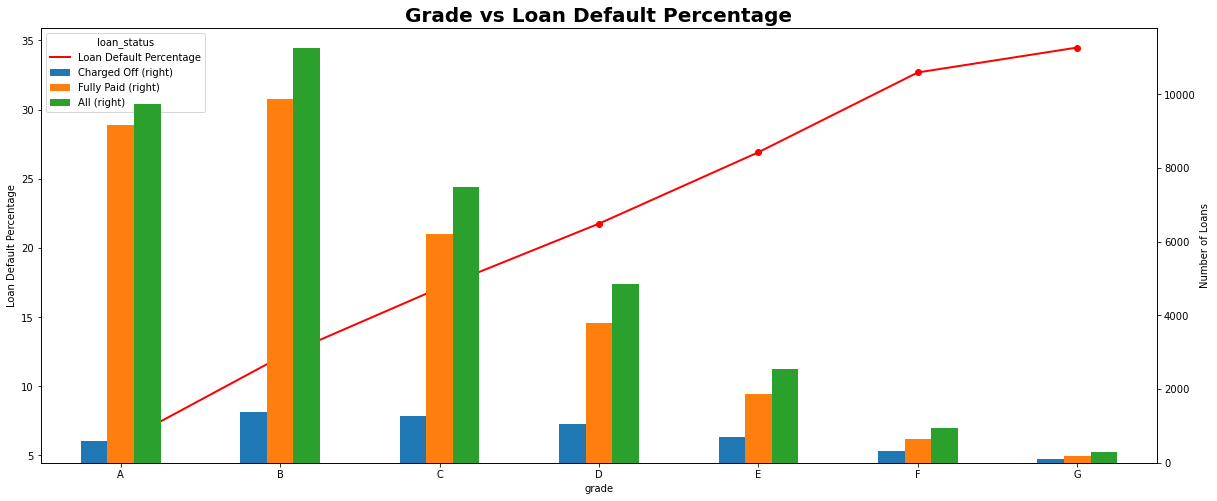

In [86]:
plot_pct_chart(df1, 'grade',stacked=False)

**Observation**<br/>
*Tendency to default the loan is increasing from Grade A to Grade G*

**Sub Grade vs loan_status and percentage of Charged Off**

loan_status,Charged Off,Fully Paid,All,Loan Default Percentage
sub_grade,,,,
A1,28,1084,1112,2.52
A2,71,1386,1457,4.87
A3,97,1643,1740,5.57
A4,173,2622,2795,6.19
A5,206,2424,2630,7.83
B1,162,1557,1719,9.42
B2,209,1695,1904,10.98
B3,327,2397,2724,12.00
B4,317,2044,2361,13.43


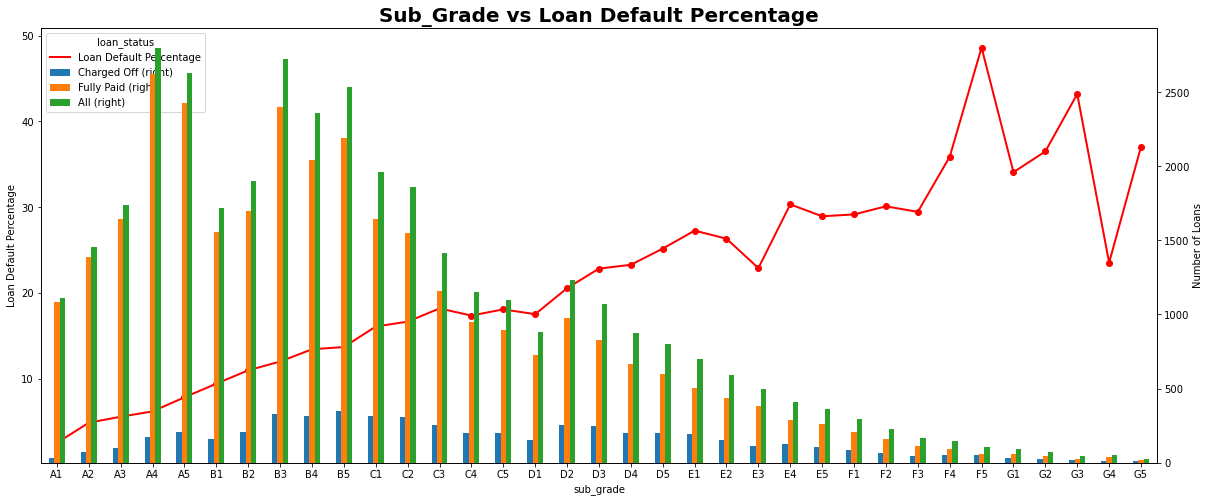

In [87]:
plot_pct_chart(df1, 'sub_grade',stacked=False)

**Observation**<br/>
*Borrowers from sub grade F5, G3 and G5 have maximum tendency to default.*

**emp_length vs loan_status and percentage of Charged Off**

loan_status,Charged Off,Fully Paid,All,Loan Default Percentage
emp_length,,,,
1 year,432,2578,3010,14.35
10 years,1287,6941,8228,15.64
2 years,531,3567,4098,12.96
3 years,537,3348,3885,13.82
4 years,440,2798,3238,13.59
5 years,447,2674,3121,14.32
6 years,299,1812,2111,14.16
7 years,256,1410,1666,15.37
8 years,200,1193,1393,14.36


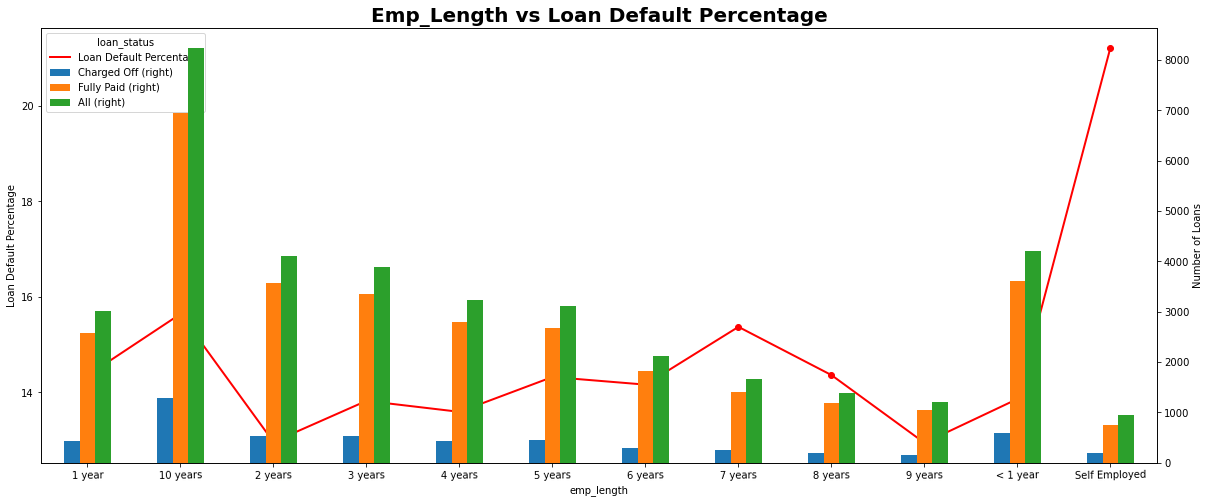

In [88]:
plot_pct_chart(df1, 'emp_length',stacked=False)

**Observation**<br/>
*Self employed, 10 years and 7 years categorys has maximum tendancy to default the loan.*

*state vs loan_status and percentage of Charged Off*

loan_status,Charged Off,Fully Paid,All,Loan Default Percentage
addr_state,,,,
AK,14,62,76,18.42
AL,54,371,425,12.71
AR,25,204,229,10.92
AZ,119,699,818,14.55
CA,1073,5652,6725,15.96
CO,92,634,726,12.67
CT,91,606,697,13.06
DC,14,193,207,6.76
DE,12,99,111,10.81


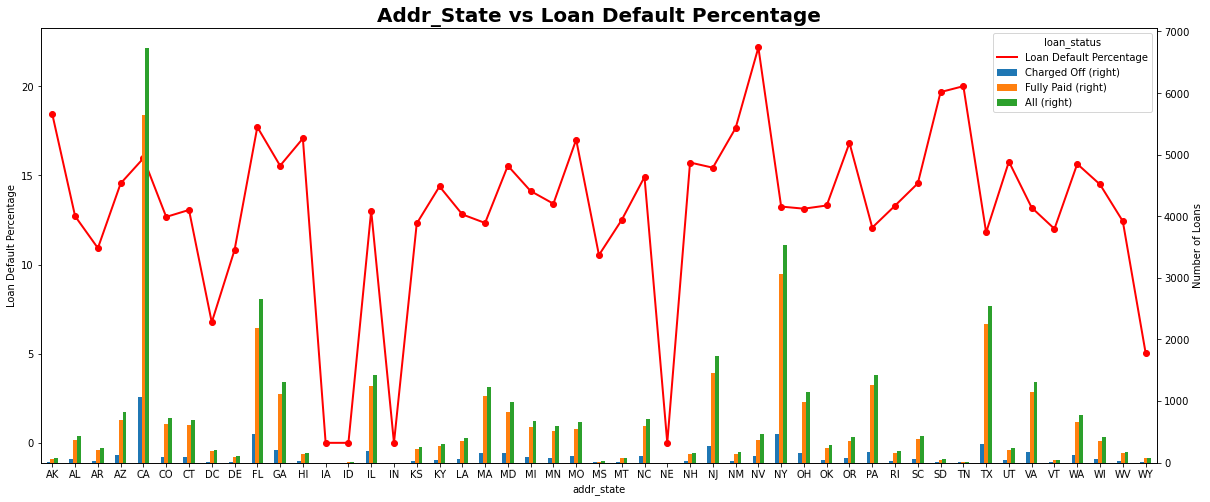

In [89]:
plot_pct_chart(df1, 'addr_state',stacked=False)

**Observation**<br/>
Borrowers from states NV, TN, SD, AK, FL and HI have maximum tendency to default the loan

**purpose vs loan_status and percentage of Charged Off**

loan_status,Charged Off,Fully Paid,All,Loan Default Percentage
purpose,,,,
car,151,1290,1441,10.48
credit_card,524,4333,4857,10.79
debt_consolidation,2666,14816,17482,15.25
educational,44,233,277,15.88
home_improvement,328,2412,2740,11.97
house,57,295,352,16.19
major_purchase,211,1872,2083,10.13
medical,100,556,656,15.24
moving,85,456,541,15.71


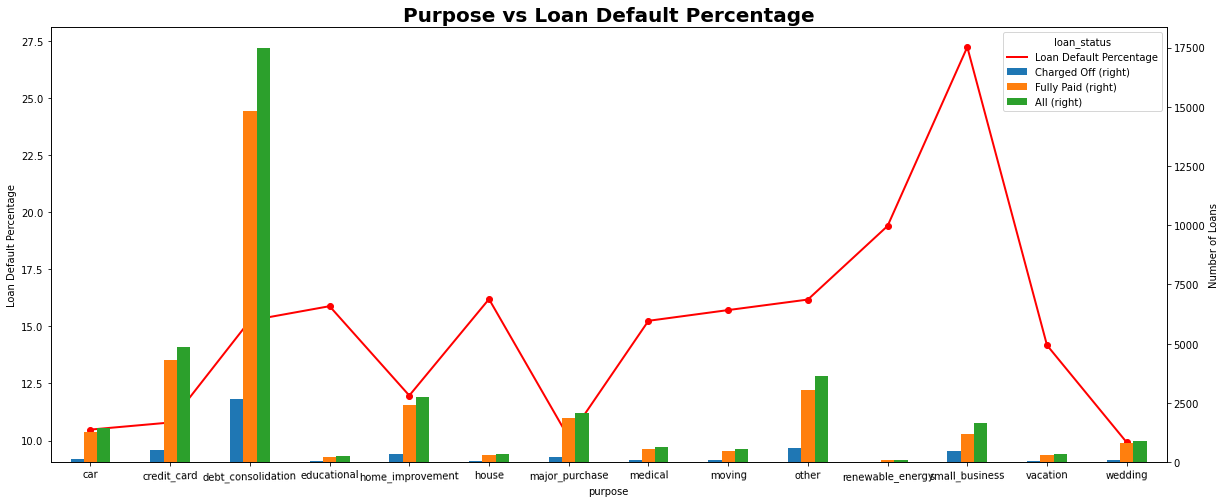

In [90]:
plot_pct_chart(df1, 'purpose',stacked=False)

**Observation**<br/>
Small business category has the highest chances to default the loan

*Home ownership vs loan_status and percentage of Charged Off*

loan_status,Charged Off,Fully Paid,All,Loan Default Percentage
home_ownership,,,,
MORTGAGE,2254,14233,16487,13.67
OTHER,18,77,95,18.95
OWN,413,2393,2806,14.72
RENT,2682,15025,17707,15.15


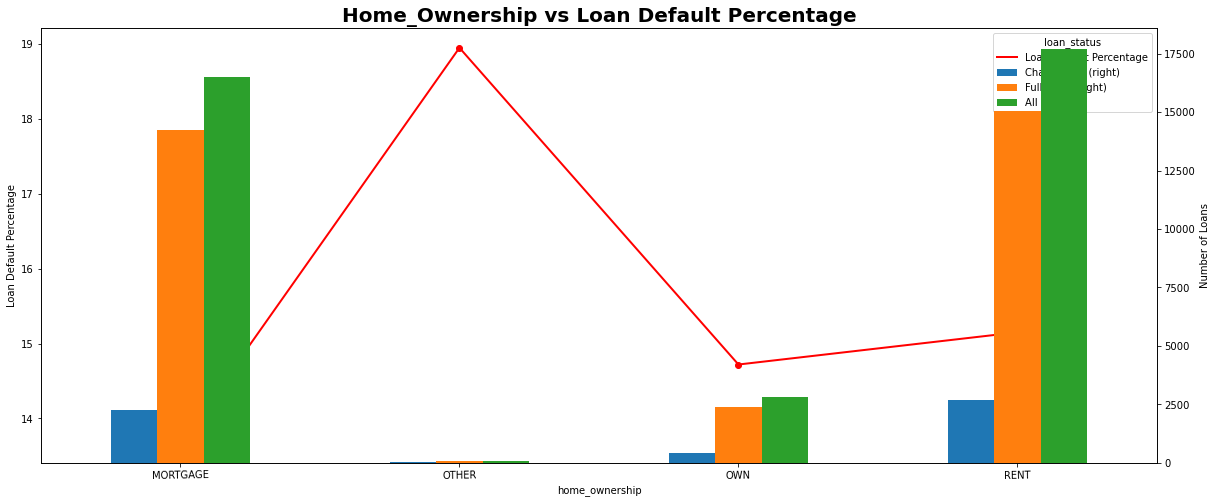

In [91]:
plot_pct_chart(df1, 'home_ownership',stacked=False) 

**Observation**<br/>
*Borrowers from Other category have highest tendency to default the loan*

*Verified status vs loan_status and percentage of Charged Off*

loan_status,Charged Off,Fully Paid,All,Loan Default Percentage
verification_status,,,,
Not Verified,1960,13751,15711,12.48
Verified,3407,17977,21384,15.93


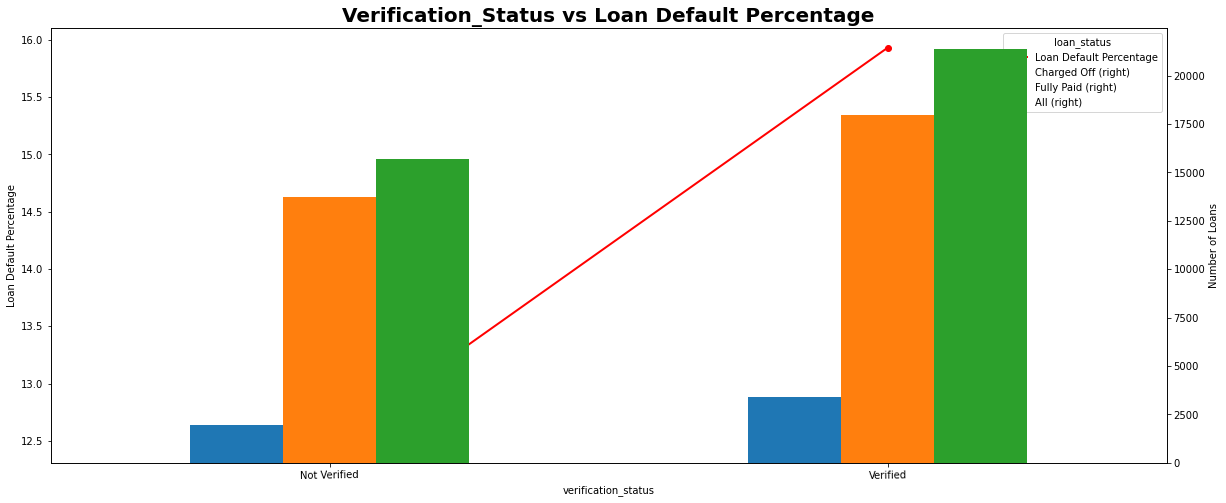

In [92]:
plot_pct_chart(df1, 'verification_status',stacked=False)

**Observation**<br/>
The verified borrowers tend to default the loan more compared to not verified borrowers

*Annual income vs loan_status and percentage of Charged Off*

loan_status,Charged Off,Fully Paid,All,Loan Default Percentage
annual_inc_group,,,,
14k-25k,378,1688,2066,18.30
25k-50k,2088,10511,12599,16.57
50k-100k,2368,15056,17424,13.59
100k-150k,414,3511,3925,10.55
150k-250k,119,962,1081,11.01


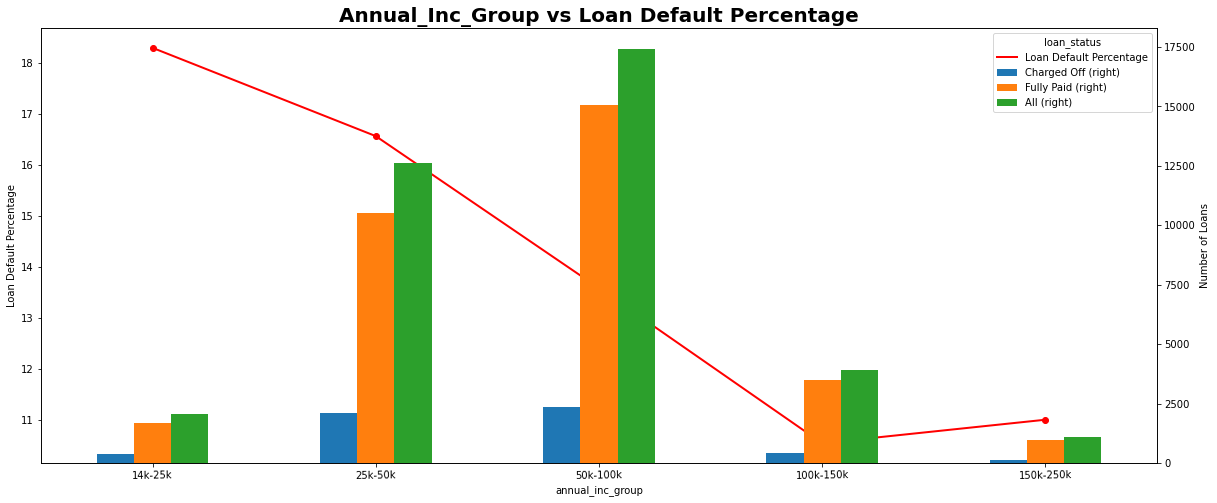

In [93]:
plot_pct_chart(df1,'annual_inc_group',stacked=False)

**Observation**<br/>
The borrowers who are in lower income groups have maximum tendency to default the loan and it generally decreases with the increase in the annual income.

*Interest rate vs loan_status and percentage of Charged Off*

loan_status,Charged Off,Fully Paid,All,Loan Default Percentage
int_rate_group,,,,
5%-9%,558,8928,9486,5.88
9%-13%,1702,11767,13469,12.64
13%-17%,2028,8652,10680,18.99
17%-21%,935,2199,3134,29.83
21%-25%,144,182,326,44.17


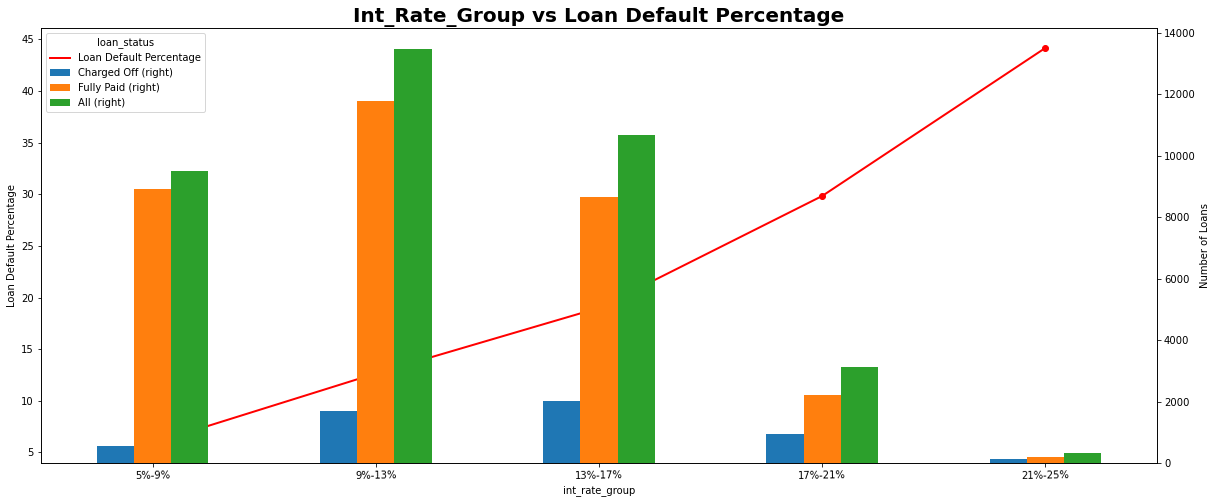

In [94]:
plot_pct_chart(df1,'int_rate_group',stacked=False)

**Observation**<br/>
The tendency to default the loan is increasing with increase in the interest rate.

<AxesSubplot:>

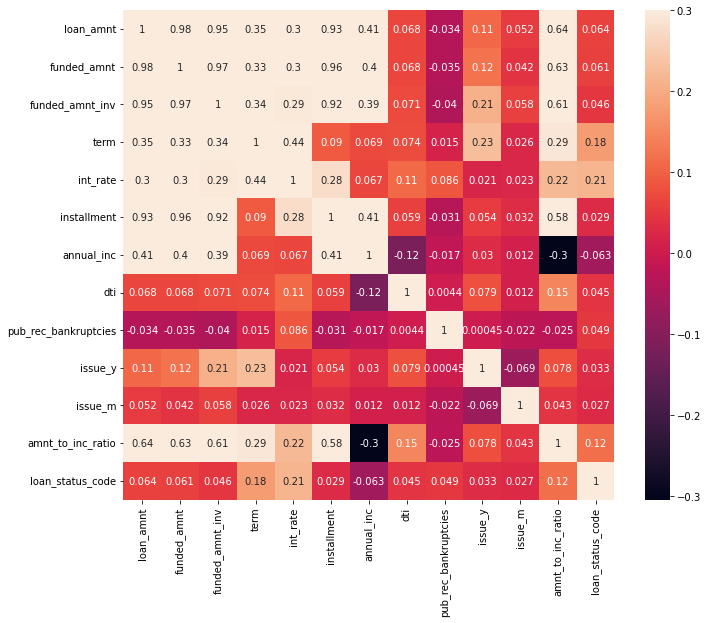

In [95]:
#To identify correlation between all variables of the dataset and see which variables are negativey impacting loan_status variable
f, ax = plt.subplots(figsize=(11, 9))
corr = df1.corr()
sns.heatmap(corr,  vmax=.3, annot=True)

**Observation**<br/>
*Correlation graph shows variables annaul_inc, installment, issue_m, amnt_to_inc_ratio, loan_amt, funded_amt, issue_y have negative impact on the loan_status variable*